In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, \
 GradientBoostingClassifier, \
AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, \
recall_score, precision_score, accuracy_score, plot_confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import IsolationForest

In [2]:
df=pd.read_csv("./datasets/final_data.csv",index_col=0)

In [3]:
df.isnull().sum()

NPI                                    0
Name                                   0
city                                   0
state                                  0
specialty_description                  0
total_drug_cost                        0
total_claim_count                      0
total_day_supply                       0
Opioid Claim Count                     0
Opioid Prescribing Rate                0
Long-Acting Opioid Claim Count         0
Long-Acting Opioid Prescribing Rate    0
Total_Payment_Sum                      0
is_fraud                               0
dtype: int64

In [4]:
df.columns

Index(['NPI', 'Name', 'city', 'state', 'specialty_description',
       'total_drug_cost', 'total_claim_count', 'total_day_supply',
       'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Total_Payment_Sum', 'is_fraud'],
      dtype='object')

In [5]:
df["is_fraud"]

0         0
1         0
2         0
3         1
4         0
         ..
503245    0
503246    0
503247    0
503248    0
503249    0
Name: is_fraud, Length: 503250, dtype: int64

In [6]:
df.corr()

,NPI,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum,is_fraud
NPI,1.000000,0.000229,-0.000304,0.000236,0.000186,-0.000254,-0.000548,0.001076,-0.001683,-0.002130
total_drug_cost,0.000229,1.000000,0.555280,0.525516,0.264773,-0.105318,0.164074,0.224739,0.021769,0.004043
total_claim_count,-0.000304,0.555280,1.000000,0.929016,0.471554,-0.110820,0.235911,0.218041,-0.003782,0.006611
total_day_supply,0.000236,0.525516,0.929016,1.000000,0.417268,-0.142410,0.185092,0.202912,-0.005035,0.004884
Opioid Claim Count,0.000186,0.264773,0.471554,0.417268,1.000000,0.272214,0.853087,0.356382,-0.000322,0.017823
Opioid Prescribing Rate,-0.000254,-0.105318,-0.110820,-0.142410,0.272214,1.000000,0.236285,0.170168,0.017645,0.003790
Long-Acting Opioid Claim Count,-0.000548,0.164074,0.235911,0.185092,0.853087,0.236285,1.000000,0.418829,-0.000640,0.018924
Long-Acting Opioid Prescribing Rate,0.001076,0.224739,0.218041,0.202912,0.356382,0.170168,0.418829,1.000000,0.004867,0.012254
Total_Payment_Sum,-0.001683,0.021769,-0.003782,-0.005035,-0.000322,0.017645,-0.000640,0.004867,1.000000,0.000906
is_fraud,-0.002130,0.004043,0.006611,0.004884,0.017823,0.003790,0.018924,0.012254,0.000906,1.000000


Pre Processing

In [7]:
#setting up the predictors and target variable

X=df[['total_drug_cost', 'total_claim_count', 'total_day_supply',
       'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Total_Payment_Sum']]
y=df["is_fraud"]

train-test-split

In [8]:
X.shape, y.shape

((503250, 8), (503250,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .25,
                                                    random_state=42,
                                                    stratify=y
                                                  )

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((377437, 8), (125813, 8), (377437,), (125813,))

In [11]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_test,y_test=sm.fit_sample(X_test, y_test)

In [12]:
X_train_res.shape,y_train_res.shape

((754486, 8), (754486,))

In [13]:
y_train.value_counts()

0    377243
1       194
Name: is_fraud, dtype: int64

In [14]:
y_train_res.value_counts()

1    377243
0    377243
Name: is_fraud, dtype: int64

In [15]:
y_test.value_counts()

1    125748
0    125748
Name: is_fraud, dtype: int64

# Logistic Regression

In [16]:
model=LogisticRegression(max_iter=1000)

In [17]:
model.fit(X_train_res,y_train_res)

LogisticRegression(max_iter=1000)

In [18]:
y_pred=model.predict(X_test)

In [19]:
model.score(X_train_res,y_train_res)

0.6063850091320448

In [21]:
model.score(X_test,y_test)

0.6305507841078983

In [22]:
pd.Series(y_pred).value_counts()

1    166515
0     84981
dtype: int64

In [23]:
model.coef_

array([[-7.16603838e-07,  1.56630861e-04, -3.62256530e-06,
         1.44629851e-03,  1.38442696e-06,  3.79752105e-04,
         3.90597599e-05, -1.45391360e-06]])

In [24]:
model.predict_proba(X_train)

array([[0.50313513, 0.49686487],
       [0.4909022 , 0.5090978 ],
       [0.50968791, 0.49031209],
       ...,
       [0.48011128, 0.51988872],
       [0.49242876, 0.50757124],
       [0.47866406, 0.52133594]])

In [25]:
list(zip(X.columns, model.coef_[0]))

[('total_drug_cost', -7.166038378657347e-07),
 ('total_claim_count', 0.00015663086097634244),
 ('total_day_supply', -3.622565296412984e-06),
 ('Opioid Claim Count', 0.0014462985101893564),
 ('Opioid Prescribing Rate', 1.3844269557036085e-06),
 ('Long-Acting Opioid Claim Count', 0.0003797521052709214),
 ('Long-Acting Opioid Prescribing Rate', 3.905975992473715e-05),
 ('Total_Payment_Sum', -1.453913602229601e-06)]

In [26]:
cm=confusion_matrix(y_test, # True values.
                 y_pred) 

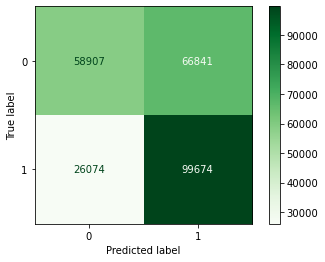

In [27]:

plot_confusion_matrix(model, X_test, y_test, cmap='Greens', values_format='d');

In [28]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 58907
True Positives: 99674
False Positives: 66841
False Negatives: 26074


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56    125748
           1       0.60      0.79      0.68    125748

    accuracy                           0.63    251496
   macro avg       0.65      0.63      0.62    251496
weighted avg       0.65      0.63      0.62    251496



high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

 The True Positive Rate (TPR) is a plot against False Positive Rate (FPR) for the probabilities of the classifier predictions. Then, the area under the plot is calculated. The greater the area under the curve the better our model is.

In [30]:
roc_auc_score(y_test, y_pred)

0.6305507841078983

In [31]:
pd.Series(y_test).value_counts(normalize=True)

1    0.5
0    0.5
Name: is_fraud, dtype: float64

# Decision Tree Classifier

In [32]:
dtc = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 7,
                            min_samples_leaf = 3,
                            ccp_alpha = 0.01,
                            random_state = 42)

In [33]:
dtc.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [34]:
y_train_res.value_counts().sort_index()

0    377243
1    377243
Name: is_fraud, dtype: int64

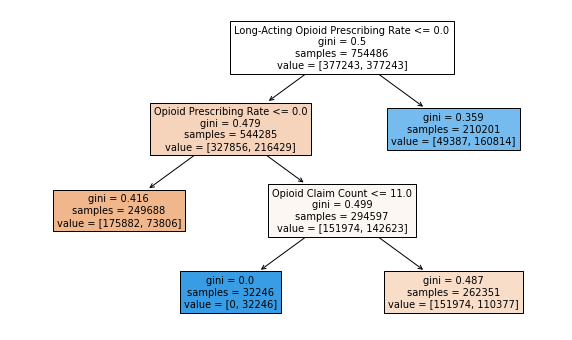

In [35]:
plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, 
           filled=True);

In [36]:
print(f'Score on training set: {dtc.score(X_train_res, y_train_res)}')
print(f'Score on testing set: {dtc.score(X_test, y_test)}')

Score on training set: 0.6904250045726494
Score on testing set: 0.7123214683334924


In [37]:
preds=dtc.predict(X_test)

In [38]:
preds

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
cm=confusion_matrix(y_test, # True values.
                 preds) 

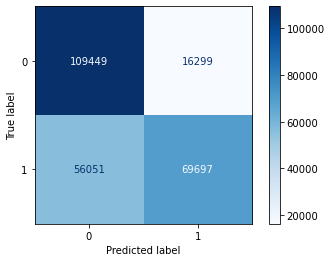

In [40]:
plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues', values_format='d');

In [41]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 109449
True Positives: 69697
False Positives: 16299
False Negatives: 56051


In [42]:
accuracy_score(y_test, preds)

0.7123214683334924

In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75    125748
           1       0.81      0.55      0.66    125748

    accuracy                           0.71    251496
   macro avg       0.74      0.71      0.70    251496
weighted avg       0.74      0.71      0.70    251496



# Bagging Classifier

In [44]:
bag = BaggingClassifier(random_state = 42)

In [45]:
# Fit BaggingClassifier.
bag.fit(X_train_res, y_train_res)

# Score BaggingClassifier.
bag.score(X_test, y_test)

0.5944945446448452

In [46]:
bag.score(X_train_res, y_train_res)

0.9999125232277338

In [47]:
preds1=bag.predict(X_test)

In [48]:
cm=confusion_matrix(y_test, # True values.
                 preds) 

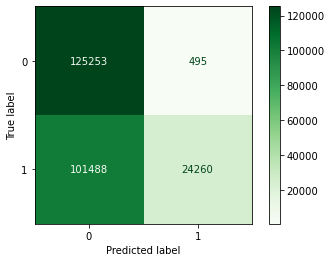

In [50]:
plot_confusion_matrix(bag, X_test, y_test, cmap='Greens', values_format='d');

In [51]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 109449
True Positives: 69697
False Positives: 16299
False Negatives: 56051


In [52]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71    125748
           1       0.98      0.19      0.32    125748

    accuracy                           0.59    251496
   macro avg       0.77      0.59      0.52    251496
weighted avg       0.77      0.59      0.52    251496



# Random Forest Classifier

In [53]:
rf = RandomForestClassifier(n_estimators=100)

In [54]:
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [55]:
y_pred=rf.predict(X_test)

In [56]:
rf.score(X_train_res,y_train_res)

1.0

In [57]:
rf.score(X_test,y_test)

0.5880451378948373

In [58]:
cm=confusion_matrix(y_test, # True values.
                 y_pred) 

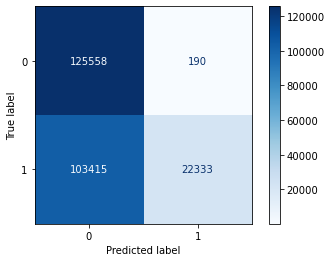

In [59]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', values_format='d');

In [60]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 125558
True Positives: 22333
False Positives: 190
False Negatives: 103415


In [61]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
pd.Series(y_pred).value_counts()

0    228973
1     22523
dtype: int64

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71    125748
           1       0.99      0.18      0.30    125748

    accuracy                           0.59    251496
   macro avg       0.77      0.59      0.50    251496
weighted avg       0.77      0.59      0.50    251496



In [64]:
list(zip(X.columns, rf.feature_importances_))

[('total_drug_cost', 0.20859136765508438),
 ('total_claim_count', 0.1388319705478172),
 ('total_day_supply', 0.17740280326226213),
 ('Opioid Claim Count', 0.11872054681791536),
 ('Opioid Prescribing Rate', 0.09277483033505997),
 ('Long-Acting Opioid Claim Count', 0.059106804487296764),
 ('Long-Acting Opioid Prescribing Rate', 0.062260202679121364),
 ('Total_Payment_Sum', 0.14231147421544288)]

# SVC

In [65]:
svc = SVC(max_iter=1000)

svc.fit(X_train_res, y_train_res)

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=1000)

In [66]:
svc.score(X_train_res, y_train_res)

0.517079177082146

In [67]:
svc.score(X_test,y_test)

0.5222071126379744

In [68]:
accuracy_score(y_test, svc.predict(X_test))

0.5222071126379744

In [69]:
y_pred=svc.predict(X_test)

In [70]:
cm=confusion_matrix(y_test, # True values.
                 y_pred) 

In [71]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 109287
True Positives: 22046
False Positives: 16461
False Negatives: 103702


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.87      0.65    125748
           1       0.57      0.18      0.27    125748

    accuracy                           0.52    251496
   macro avg       0.54      0.52      0.46    251496
weighted avg       0.54      0.52      0.46    251496



# AdaBoost Classifier

In [73]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [74]:
ada.fit(X_train_res, y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [75]:
ada.score(X_test, y_test)

0.603878391704043

In [76]:
ada.score(X_train_res, y_train_res)

1.0

In [77]:
pred=ada.predict(X_test)

In [78]:
cm=confusion_matrix(y_test, # True values.
                 pred) 

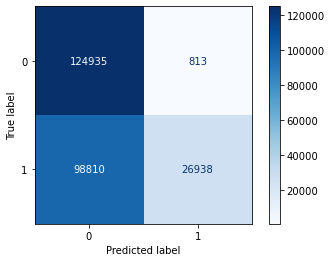

In [79]:
plot_confusion_matrix(ada, X_test, y_test, cmap='Blues', values_format='d');

In [80]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 124935
True Positives: 26938
False Positives: 813
False Negatives: 98810


In [81]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.99      0.71    125748
           1       0.97      0.21      0.35    125748

    accuracy                           0.60    251496
   macro avg       0.76      0.60      0.53    251496
weighted avg       0.76      0.60      0.53    251496



# Unsupervised learming

In [82]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [83]:
X_train_res

,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum
0,139113.030000,1493,40412,0.000000,0.000000,0.000000,0.000000,209.670000
1,393.690000,75,1864,44.000000,29.330000,0.000000,0.000000,22005.150000
2,59491.250000,1184,57520,20.000000,1.160000,0.000000,0.000000,1466.200000
3,111.980000,35,349,0.000000,0.000000,0.000000,0.000000,3554.550000
4,5368.040000,188,4675,0.000000,0.000000,0.000000,0.000000,546.620000
...,...,...,...,...,...,...,...,...
754481,539525.833857,5006,151013,2952.219961,57.008721,1347.472204,45.496601,2691.519016
754482,91204.748603,1942,97491,73.971012,2.547890,3.767042,1.743113,1854.910542
754483,2141.409707,172,1705,35.409505,8.311117,0.000000,0.000000,39.737364
754484,970.682224,85,2117,6.926422,2.584088,0.000000,0.000000,398.877199


In [84]:
ss = StandardScaler()
df_std = ss.fit_transform(X_train_res)

In [85]:
model = KMeans(n_clusters=6, random_state=0).fit(df_std)

In [86]:
model.labels_

array([1, 3, 1, ..., 1, 1, 4], dtype=int32)

In [87]:
predicted_group = model.labels_

In [88]:
pd.Series(predicted_group).value_counts()

1    508805
0     85429
3     80829
4     72076
2      5498
5      1849
dtype: int64

In [89]:
centroids = model.cluster_centers_
centroids

array([[ 1.56097922,  2.16737481,  2.24447967,  0.73748105, -0.24315461,
         0.17775688,  0.28012601, -0.02043798],
       [-0.24447214, -0.30704975, -0.2976857 , -0.26789184, -0.43389725,
        -0.19622225, -0.37479038, -0.04006849],
       [ 4.10046148,  3.07549417,  2.39002936,  9.17369698,  2.3869134 ,
         9.87436768,  2.58997656,  0.05805867],
       [-0.43904877, -0.52106878, -0.5562575 , -0.16057934,  1.85124593,
        -0.18245875, -0.30668839, -0.01521933],
       [ 0.05877535, -0.04766559, -0.1124518 ,  0.48818505,  1.06027542,
         0.6107297 ,  2.4173856 , -0.02675243],
       [-0.1670469 , -0.18898947, -0.23703491,  0.40007029,  1.72970387,
         0.62284915,  1.78030722, 13.51053174]])

In [92]:
#use elbow method to find best k
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_std)
    df_std["clusters"] = kmeans.labels_
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [93]:
df_std

array([[-0.13731092, -0.21589423, -0.3432112 , ..., -0.20974705,
        -0.46435397, -0.09279719],
       [-0.46214909, -0.56405117, -0.57776805, ..., -0.20974705,
        -0.46435397,  0.16970736],
       [-0.32376072, -0.291762  , -0.23911245, ..., -0.20974705,
        -0.46435397, -0.07766356],
       ...,
       [-0.45805646, -0.54023507, -0.57873554, ..., -0.20974705,
        -0.46435397, -0.09484386],
       [-0.46079795, -0.5615959 , -0.5762286 , ..., -0.20974705,
        -0.46435397, -0.09051839],
       [-0.11133303,  0.21623285,  0.47232839, ...,  0.02440747,
         1.84178164, -0.089998  ]])

In [94]:
predicted_group=predicted_group.ravel()
predicted_group

array([1, 3, 1, ..., 1, 1, 4], dtype=int32)

# Anomaly detection

In [172]:
isolation_forest = IsolationForest(n_estimators=100)

In [173]:
isolation_forest.fit(X_train_res)

IsolationForest()

In [185]:
xx = np.linspace(X_train_res.min(), X_train_res.max())

In [186]:
anomaly_score = isolation_forest.decision_function(xx)

In [187]:
outlier = isolation_forest.predict(xx)

In [188]:
outlier

array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [189]:
anomaly_score

array([ 0.14987537, -0.11507381, -0.17893581, -0.19464282, -0.21130419,
       -0.23022811, -0.24948716, -0.25406492, -0.26382111, -0.27213468,
       -0.28001081, -0.28583766, -0.29224388, -0.29385357, -0.29331664,
       -0.29935504, -0.30206379, -0.30805538, -0.3135411 , -0.3135411 ,
       -0.3135411 , -0.31851009, -0.32017316, -0.31961843, -0.31961843,
       -0.31906407, -0.3240668 , -0.32685928, -0.32797892, -0.32910008,
       -0.32910008, -0.32910008, -0.33022275, -0.3330361 , -0.3330361 ,
       -0.3341641 , -0.33472868, -0.33472868, -0.33472868, -0.33472868,
       -0.33529363, -0.33585897, -0.33585897, -0.33585897, -0.33585897,
       -0.3369908 , -0.33585897, -0.33585897, -0.33925905, -0.33982708])